<a href="https://colab.research.google.com/github/ShreyaRuhela/VIT--Animal10/blob/main/CNN_vs_VIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision transformers datasets timm matplotlib scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"


'10301182022_Sakshi Gupta.gdoc'
 11901182022.png
'11901182022-Shreya Ruhela'
'11901182022, Shreya Ruhela.pdf'
'119_Shreya Ruhela'
'119_Shreya Ruhela CC .docx.pdf'
'119_Shreya Ruhela_cnlabfile.pdf'
'119_Shreya Ruhela_Color image processing.pdf'
'119_Shreya Ruhela Colour image processing.pdf'
'119_Shreya Ruhela dip_file (1).pdf'
'119_Shreya Ruhela dip_file.pdf'
'119_Shreya Ruhela_Frequency Reuse.pdf'
'119_SHREYA RUHELA Image processing.pdf'
'119_Shreya Ruhela resume.pdf'
'119_Shreya Ruhela VLSI.pdf'
 148_Tavleen_CC_LabFile.gdoc
'2026 SHREYA.gsheet'
'AdmitCard-210310091802 (2).gdoc'
 animal10.zip
 Animals-10
 Binary_Trees_Patterns_and_Problems_Guide.pdf
 certificateDKM.jpeg
 certificates
 chest_xray
 Classroom
' CN Lab File ECE AI.gdoc'
 Codefiesta
'Colab Notebooks'
'Computer Networks.gdoc'
'Copy of A-Team Glow Up Tracker.gsheet'
'Copy of Copy of Lecture Plan.gdoc'
'Copy of DL Labfile.gdoc'
'Copy of Goldman Sachs Internship (Responses) (1).gsheet'
'Copy of Goldman Sachs Internship (Respon

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
data_dir = "/content/drive/MyDrive/animal10"


In [ ]:
!unzip "/content/drive/MyDrive/animal10.zip" -d "/content/drive/MyDrive/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2373).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2374).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2375).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2376).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2377).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2378).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2379).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (238).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (238).jpg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2380).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2381).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spider/spider (2382).jpeg  
  inflating: /content/drive/MyDrive/Animals-10/spide

In [ ]:
!ls /content/drive/MyDrive


'10301182022_Sakshi Gupta.gdoc'
 11901182022.png
'11901182022-Shreya Ruhela'
'11901182022, Shreya Ruhela.pdf'
'119_Shreya Ruhela'
'119_Shreya Ruhela CC .docx.pdf'
'119_Shreya Ruhela_cnlabfile.pdf'
'119_Shreya Ruhela_Color image processing.pdf'
'119_Shreya Ruhela Colour image processing.pdf'
'119_Shreya Ruhela dip_file (1).pdf'
'119_Shreya Ruhela dip_file.pdf'
'119_Shreya Ruhela_Frequency Reuse.pdf'
'119_SHREYA RUHELA Image processing.pdf'
'119_Shreya Ruhela resume.pdf'
'119_Shreya Ruhela VLSI.pdf'
 148_Tavleen_CC_LabFile.gdoc
'2026 SHREYA.gsheet'
'AdmitCard-210310091802 (2).gdoc'
 animal10.zip
 Animals-10
 Binary_Trees_Patterns_and_Problems_Guide.pdf
 certificateDKM.jpeg
 certificates
 chest_xray
 Classroom
' CN Lab File ECE AI.gdoc'
 Codefiesta
'Colab Notebooks'
'Computer Networks.gdoc'
'Copy of A-Team Glow Up Tracker.gsheet'
'Copy of Copy of Lecture Plan.gdoc'
'Copy of DL Labfile.gdoc'
'Copy of Goldman Sachs Internship (Responses) (1).gsheet'
'Copy of Goldman Sachs Internship (Respon

In [ ]:
!ls /content/drive/MyDrive/Animals-10


butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [ ]:
!ls /content/drive/MyDrive/animal10.zip


/content/drive/MyDrive/animal10.zip


In [ ]:

import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [ ]:
data_dir = "/content/drive/MyDrive/Animals-10"

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

print("Classes:", dataset.classes)
print("Total Images:", len(dataset))


Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Total Images: 26179


In [ ]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
#STEP 6 – Load Vision Transformer Model
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=len(dataset.classes),
    ignore_mismatched_sizes=True
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)


In [ ]:
total = len(dataset)
train_count = len(train_dataset)
test_count = len(test_dataset)

print("Total Images :", total)
print("Train Images :", train_count)
print("Test Images  :", test_count)

print("\nTrain % :", round((train_count/total)*100, 2))
print("Test %  :", round((test_count/total)*100, 2))


Total Images : 26179
Train Images : 20943
Test Images  : 5236

Train % : 80.0
Test %  : 20.0


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch32-224",
    num_labels=len(dataset.classes),
    ignore_mismatched_sizes=True
)


OSError: google/vit-base-patch32-224 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`

In [ ]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch32-224-in21k",
    num_labels=len(dataset.classes),
    ignore_mismatched_sizes=True
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch32-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [ ]:
for param in model.vit.parameters():
    param.requires_grad = False


In [ ]:
epochs = 5

for epoch in range(epochs):

    # -------- TRAINING --------
    model.train()
    running_loss = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images).logits
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    # -------- EVALUATION --------
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images).logits
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    print(f"Epoch {epoch+1} | Loss: {avg_loss:.4f} | Test Accuracy: {accuracy:.2f}%")


Epoch 1 | Loss: 2.3247 | Test Accuracy: 4.13%
Epoch 2 | Loss: 2.3247 | Test Accuracy: 4.13%
Epoch 3 | Loss: 2.3247 | Test Accuracy: 4.13%
Epoch 4 | Loss: 2.3247 | Test Accuracy: 4.13%
Epoch 5 | Loss: 2.3247 | Test Accuracy: 4.13%


### **Try again**

In [ ]:
print(dataset.classes)
print(len(dataset.classes))


['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
10


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [ ]:
for param in model.vit.parameters():
    param.requires_grad = False


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)


In [ ]:
print(model.classifier)


Linear(in_features=768, out_features=10, bias=True)


In [ ]:
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=1e-3)


In [ ]:
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=10,
    ignore_mismatched_sizes=True
)
model.to(device)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
batch_size = 16


In [ ]:
epochs = 5

for epoch in range(epochs):

    model.train()

    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images).logits
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # ---- Accuracy Calculation ----
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    print(f"Epoch {epoch+1} | Training Loss: {epoch_loss:.4f} | Training Accuracy: {epoch_acc:.2f}%")


In [ ]:
from sklearn.metrics import classification_report

all_preds = []
all_labels = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)

        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=dataset.classes))


              precision    recall  f1-score   support

   butterfly       0.99      0.99      0.99       413
         cat       0.99      0.99      0.99       295
     chicken       0.99      0.99      0.99       599
         cow       0.97      0.97      0.97       366
         dog       0.99      0.99      0.99      1005
    elephant       0.99      0.99      0.99       301
       horse       1.00      0.99      0.99       526
       sheep       0.98      0.97      0.98       373
      spider       1.00      0.99      0.99       971
    squirrel       1.00      0.99      1.00       387

    accuracy                           0.99      5236
   macro avg       0.99      0.99      0.99      5236
weighted avg       0.99      0.99      0.99      5236



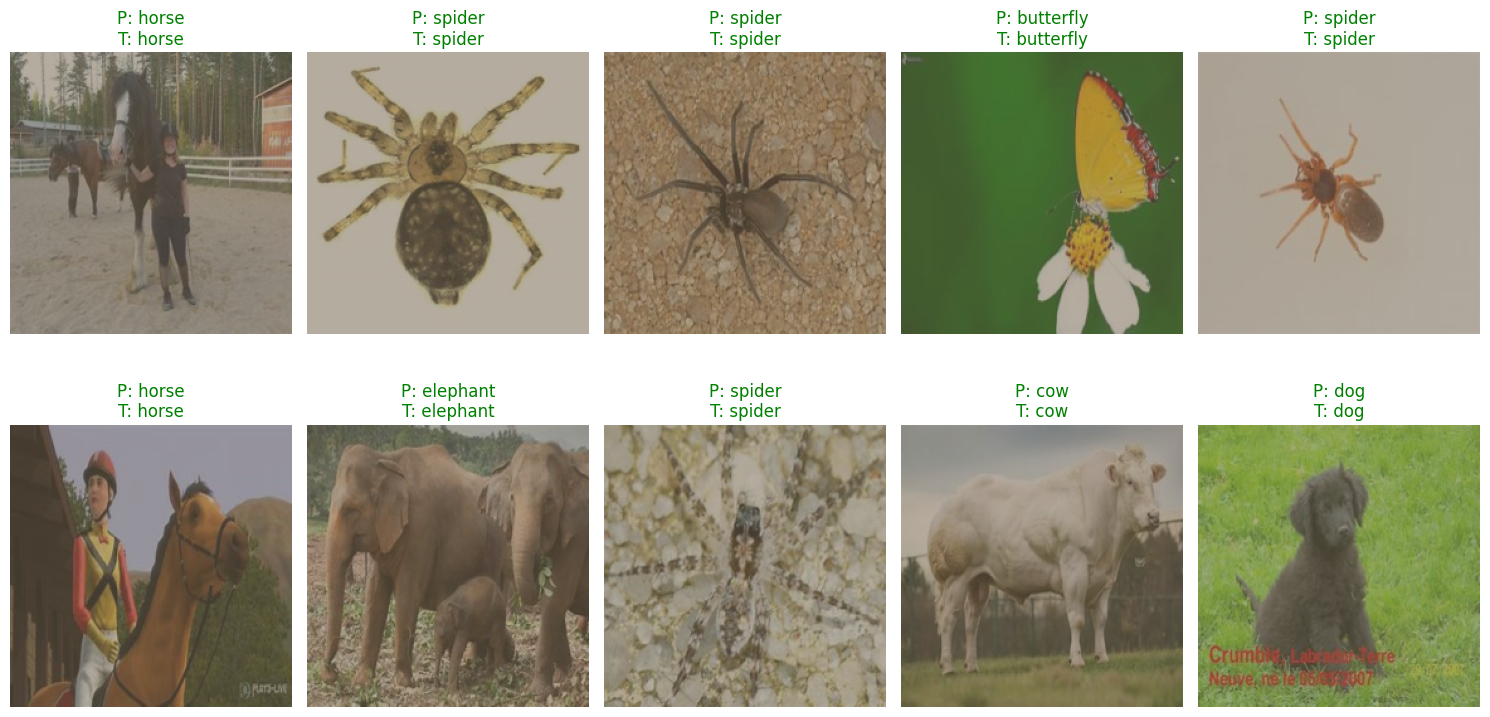

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

model.eval()

# Get a batch of test images
images, labels = next(iter(test_loader))

images = images.to(device)
labels = labels.to(device)

with torch.no_grad():
    outputs = model(images).logits
    _, preds = torch.max(outputs, 1)

# Move to CPU for visualization
images = images.cpu()
preds = preds.cpu()
labels = labels.cpu()

# Function to unnormalize image for display
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)
    return img

# Plot 10 sample predictions
plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imshow(images[i]))

    true_label = dataset.classes[labels[i]]
    pred_label = dataset.classes[preds[i]]

    color = "green" if true_label == pred_label else "red"

    plt.title(f"P: {pred_label}\nT: {true_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import random

indices = random.sample(range(len(test_dataset)), 10)

images = torch.stack([test_dataset[i][0] for i in indices])
labels = torch.tensor([test_dataset[i][1] for i in indices])


In [ ]:
def predict_single_image(img_tensor):
    model.eval()
    with torch.no_grad():
        img = img_tensor.unsqueeze(0).to(device)
        output = model(img).logits
        _, pred = torch.max(output, 1)
    return dataset.classes[pred.item()]


In [ ]:
sample_img, sample_label = test_dataset[25]

plt.imshow(imshow(sample_img))
print("Predicted:", predict_single_image(sample_img))
print("Actual:", dataset.classes[sample_label])


NameError: name 'imshow' is not defined

In [ ]:
import torchvision.models as models


In [ ]:
resnet_model = models.resnet50(pretrained=True)

# Change final layer to match 10 classes
resnet_model.fc = torch.nn.Linear(resnet_model.fc.in_features, len(dataset.classes))

resnet_model = resnet_model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 191MB/s]


In [ ]:
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(resnet_model.parameters(), lr=1e-4)


In [ ]:
epochs = 5

for epoch in range(epochs):

    resnet_model.train()

    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = resnet_model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    print(f"Epoch {epoch+1} | Training Loss: {epoch_loss:.4f} | Training Accuracy: {epoch_acc:.2f}%")


Epoch 1 | Training Loss: 0.3000 | Training Accuracy: 90.78%
Epoch 2 | Training Loss: 0.1398 | Training Accuracy: 95.68%
Epoch 3 | Training Loss: 0.1049 | Training Accuracy: 96.62%
Epoch 4 | Training Loss: 0.0816 | Training Accuracy: 97.37%
Epoch 5 | Training Loss: 0.0726 | Training Accuracy: 97.62%


In [ ]:
resnet_model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = resnet_model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

resnet_test_accuracy = 100 * correct / total

print(f"ResNet Test Accuracy: {resnet_test_accuracy:.2f}%")


ResNet Test Accuracy: 95.30%


In [ ]:
from sklearn.metrics import classification_report

all_preds = []
all_labels = []

resnet_model.eval()

with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)

        outputs = resnet_model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=dataset.classes))


              precision    recall  f1-score   support

   butterfly       0.97      0.94      0.96       413
         cat       0.97      0.93      0.95       295
     chicken       0.99      0.94      0.96       599
         cow       0.92      0.93      0.92       366
         dog       0.93      0.97      0.95      1005
    elephant       0.99      0.90      0.94       301
       horse       0.93      0.95      0.94       526
       sheep       0.93      0.93      0.93       373
      spider       0.96      0.98      0.97       971
    squirrel       0.97      0.97      0.97       387

    accuracy                           0.95      5236
   macro avg       0.96      0.94      0.95      5236
weighted avg       0.95      0.95      0.95      5236



Training for vit

In [ ]:
vit_train_loss = []
vit_train_acc = []

epochs = 5

for epoch in range(epochs):

    model.train()

    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images).logits
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    vit_train_loss.append(epoch_loss)
    vit_train_acc.append(epoch_acc)

    print(f"ViT Epoch {epoch+1} | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.2f}%")


ViT Epoch 1 | Loss: 0.1483 | Acc: 96.86%
ViT Epoch 2 | Loss: 0.0188 | Acc: 99.68%
ViT Epoch 3 | Loss: 0.0095 | Acc: 99.83%
ViT Epoch 4 | Loss: 0.0037 | Acc: 99.94%
ViT Epoch 5 | Loss: 0.0058 | Acc: 99.87%


TRAINING FOR RESNET

In [ ]:
cnn_train_loss = []
cnn_train_acc = []

for epoch in range(epochs):

    resnet_model.train()

    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = resnet_model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    cnn_train_loss.append(epoch_loss)
    cnn_train_acc.append(epoch_acc)

    print(f"ResNet Epoch {epoch+1} | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.2f}%")


ResNet Epoch 1 | Loss: 0.2925 | Acc: 91.40%
ResNet Epoch 2 | Loss: 0.1415 | Acc: 95.66%
ResNet Epoch 3 | Loss: 0.1014 | Acc: 96.81%
ResNet Epoch 4 | Loss: 0.0858 | Acc: 97.43%
ResNet Epoch 5 | Loss: 0.0665 | Acc: 97.95%


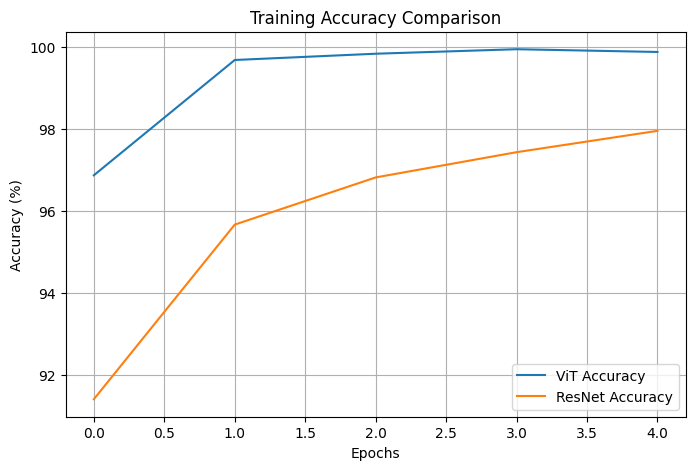

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(vit_train_acc, label="ViT Accuracy")
plt.plot(cnn_train_acc, label="ResNet Accuracy")

plt.title("Training Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()

plt.show()


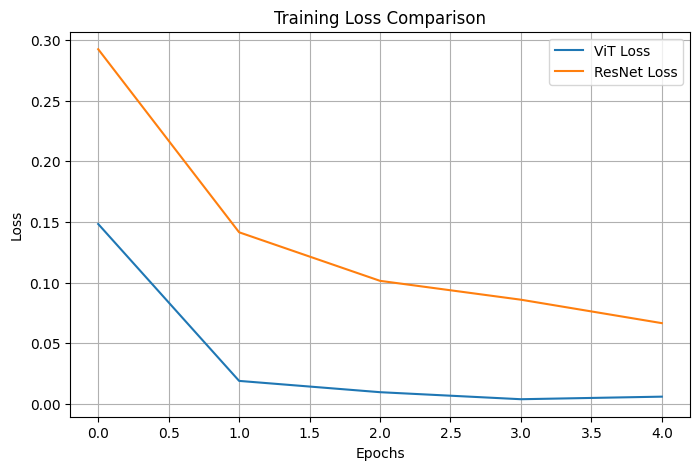

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(vit_train_loss, label="ViT Loss")
plt.plot(cnn_train_loss, label="ResNet Loss")

plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()


## ViT testing

In [ ]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

vit_test_accuracy = 100 * correct / total

print(f"ViT Test Accuracy: {vit_test_accuracy:.2f}%")


ViT Test Accuracy: 98.05%


## Resnet Testing

In [ ]:
resnet_model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = resnet_model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

resnet_test_accuracy = 100 * correct / total

print(f"ResNet Test Accuracy: {resnet_test_accuracy:.2f}%")


ResNet Test Accuracy: 93.91%


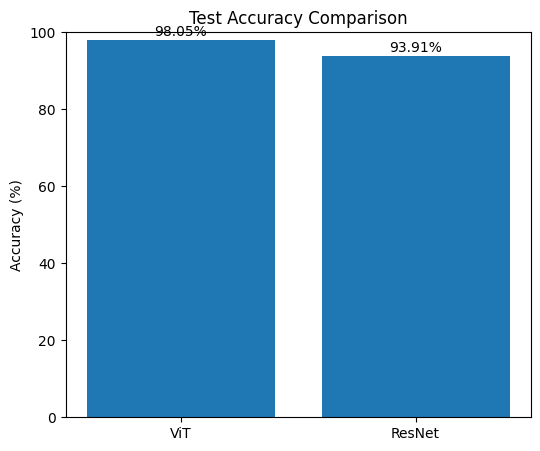

In [ ]:
models = ['ViT', 'ResNet']
accuracies = [vit_test_accuracy, resnet_test_accuracy]

plt.figure(figsize=(6,5))
plt.bar(models, accuracies)

plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0,100)

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()


In [ ]:
#Compare Number of Parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

print("ViT Parameters:", count_parameters(model))
print("ResNet Parameters:", count_parameters(resnet_model))


ViT Parameters: 85806346
ResNet Parameters: 23528522


In [ ]:
#Model Size on Disk
torch.save(model.state_dict(), "vit.pth")
torch.save(resnet_model.state_dict(), "resnet.pth")

import os

print("ViT Model Size (MB):", os.path.getsize("vit.pth") / 1e6)
print("ResNet Model Size (MB):", os.path.getsize("resnet.pth") / 1e6)


ViT Model Size (MB): 343.292279
ResNet Model Size (MB): 94.426425


In [ ]:
#Inference Time Comparison
import time

def measure_inference_time(model):
    model.eval()
    images, _ = next(iter(test_loader))
    images = images.to(device)

    start = time.time()

    with torch.no_grad():
        for _ in range(50):      # run multiple times for stability
            if model == resnet_model:
                _ = model(images)
            else:
                _ = model(images).logits

    end = time.time()
    return (end - start) / 50


print("ViT Inference Time per batch:", measure_inference_time(model))
print("ResNet Inference Time per batch:", measure_inference_time(resnet_model))


ViT Inference Time per batch: 0.1523688793182373
ResNet Inference Time per batch: 0.04305612564086914


In [ ]:
#Training Time Comparison
vit_time = vit_end_time - vit_start_time
cnn_time = cnn_end_time - cnn_start_time

print("ViT Training Time:", vit_time)
print("ResNet Training Time:", cnn_time)


NameError: name 'vit_end_time' is not defined

In [ ]:
print("GPU Memory after ViT:", torch.cuda.memory_allocated()/1e6, "MB")
print("GPU Memory after ResNet:", torch.cuda.memory_allocated()/1e6, "MB")


GPU Memory after ViT: 1794.504704 MB
GPU Memory after ResNet: 1794.504704 MB


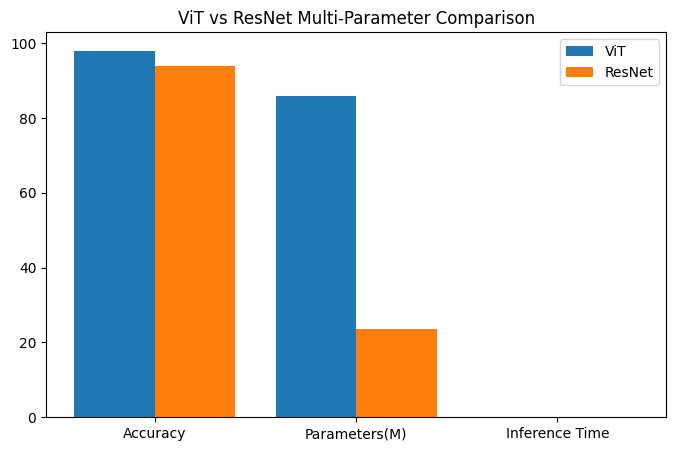

In [ ]:
labels = ['Accuracy', 'Parameters(M)', 'Inference Time']
vit_vals = [vit_test_accuracy, count_parameters(model)/1e6, measure_inference_time(model)]
cnn_vals = [resnet_test_accuracy, count_parameters(resnet_model)/1e6, measure_inference_time(resnet_model)]

x = range(len(labels))

plt.figure(figsize=(8,5))
plt.bar(x, vit_vals, width=0.4, label='ViT')
plt.bar([i+0.4 for i in x], cnn_vals, width=0.4, label='ResNet')

plt.xticks([i+0.2 for i in x], labels)
plt.legend()
plt.title("ViT vs ResNet Multi-Parameter Comparison")
plt.show()


In [ ]:
from google.colab import files
files.upload()


Saving elephant.jpg to elephant.jpg
Saving cat_grass.jpg to cat_grass.jpg
Saving dog_beach_.jpg to dog_beach_.jpg


{'elephant.jpg': b'RIFF\n\xc9\x00\x00WEBPVP8 \xfe\xc8\x00\x00\xb0\xb0\x02\x9d\x01*X\x02\x18\x02>m0\x93G$"\xa2!*\xb6j\xc0\x80\r\x89c;\x1d\\\n\rzG\xd1\xca\x97\xe4\xc5\xc10\x14[\xba7OVe\x8e\x00\x93\xfe\xe3"Iw\x1e_\xfd\xaf\xcc\xffl\xceY\xf2\xdf\xec\xdau\xe17\xdcY\x9b\xfb\xa7}\x9f\xfa\x9f\xb7\x1e\xf3\xff\xab\x7f\xbc\xf6\x19\xfe\xa7\xfe+\xd5\x0f\xfe\xff\xdb_\x7f\xbf\xe1\xbf\xf4\xfa\x9b\xfd\xc4\xf5\xa2\xf4\xcf\xfeo\xd4\x17\xfbg\xa6\x9f\xab\xaf\xa2\x0f\xee\x97\xac\xff\xac/\xf8\xffJo\xf8\x9e\xa0\x1f\xff\xfd\xbau\'\xd8\x9b\xe7\x9fj\xf0i\xc7\x9f\xc1\xff\xb1\xe6G\xf5_\xdb9\xdd\xff#\xbe\xff\xd9?\xb1\xf4\x0b\xc5.\xd7\xde\x1f\xfe\x9f\xa1~\x04\xff\x9f\xe7\x17\xee\xdf\xf0}\x81<\xb3\xff\xc3\xe1\xf7\xf9\x8f\xfb\x9e\xc0\x9f\xd7\x7f\xcf~\xd6\xfb\xc2\x7f\xc9\xe4\x93\xf7OP\xef\xda\xde\xb7\xdf\xbe\xbf\xff\xfd\xe4\x7fy\x0f\x0f(\xf1g\x94\x176yM\xa8\x01bW\x80\x16\xdc\x94x\xb3\xc9\xec\xd2\x8c\xd1y\x0eq\x99u\xeam\x9eP\\\xc2\xa9\xc0\x9c\xadg\xa5\x11^\x00[rQ\xe2\xcf(.l\xf2\x83f\xaccm\xe5\xa5\x1bIA\x855\xcf\xba-;\x9a

In [ ]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=4372ce8a1c3017ed7ccf5b98a2e367d005022362e4a3472ae1f1533e266006df
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [ ]:
#Grad cam on resnet
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import transforms
import numpy as np
import cv2
from PIL import Image


In [ ]:
#ViT attention maps
def resnet_xai(image_path):

    img = Image.open(image_path).convert("RGB")

    preprocess = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    input_tensor = preprocess(img).unsqueeze(0).to(device)

    target_layer = [resnet_model.layer4[-1]]

    cam = GradCAM(model=resnet_model, target_layers=target_layer)

    grayscale_cam = cam(input_tensor=input_tensor)[0]

    rgb_img = np.array(img.resize((224,224))) / 255.0

    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    plt.figure(figsize=(6,6))
    plt.title("ResNet Grad-CAM Focus")
    plt.imshow(visualization)
    plt.axis("off")
    plt.show()


In [ ]:
def vit_xai(image_path):

    img = Image.open(image_path).convert("RGB")

    img_tensor = test_transform(img)

    show_attention(img_tensor)


In [ ]:
def compare_xai(image_path):

    print("IMAGE:", image_path)

    print("\n--- ViT Attention Map ---")
    vit_xai(image_path)

    print("\n--- ResNet Grad-CAM ---")
    resnet_xai(image_path)


In [ ]:
compare_xai("elephant.jpg")
compare_xai("cat_grass.jpg")
compare_xai("cdog_beach_.jpg")


IMAGE: elephant.jpg

--- ViT Attention Map ---


NameError: name 'test_transform' is not defined

In [ ]:
from torchvision import transforms

test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
compare_xai("elephant.jpg")


IMAGE: elephant.jpg

--- ViT Attention Map ---


NameError: name 'show_attention' is not defined

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

def show_attention(image_tensor):

    model.eval()

    image = image_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)

    attentions = outputs.attentions

    # Use attention from last layer
    last_layer_attention = attentions[-1]

    # Average over all heads
    attn = last_layer_attention.mean(dim=1)

    # Remove batch dimension
    attn = attn.squeeze(0)

    # Take attention from CLS token
    attn = attn[0, 1:]

    # Reshape to 14x14
    attn = attn.reshape(14, 14).cpu().numpy()

    # Normalize
    attn = (attn - attn.min()) / (attn.max() - attn.min())

    # Convert original image for display
    img = image_tensor.numpy().transpose(1,2,0)
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)

    attn = cv2.resize(attn, (224,224))

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.imshow(attn, cmap='jet', alpha=0.5)
    plt.title("ViT Attention Map")
    plt.axis("off")

    plt.show()


In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


NameError: name 'transforms' is not defined